# Algoritmos baseados em proximidade
### Equipe de apoio: Moisés Santos; Contatos: [Linkedin](https://www.linkedin.com/in/moises-rocha-santos/), [Github](https://github.com/moisesrsantos) 
### Professor: André de Carvalho

Hoje nós vamos falar um pouco mais do algoritmo KNN, mas agora focado na tarefa de regressão. Vamos introduzir seu conceito e comparar seu desempenho em uma tarefa do mundo real em relação à regressão linear. Os tópicos que serão abordados hoje serão:

- Intuição do KNN para regressão
- Sintaxe simples do KNN para regressão
- Tipos diferentes de formatação de dados
- Por dentro do Pipeline
- Avaliação de desempenho em uma tarefa complexa

Vamos começar a prática carregando os pacotes necessários:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, make_scorer, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from scipy.stats import wilcoxon

## Intuição do KNN para regressão

O KNN para regressão possui uma intuição próxima à versão para classificação, porém como nossos valores são contínuos é calculada a média dos vizinhos mais próximos para determinar o valor da variável alvo (target).

<div>
<img src="./data/knn_image.png" width="900"/>
</div>

## Sintaxe simples do KNN para regressão no sklearn

Antes de partimos para exemplos mais complexos veremos a sintaxe do KNN para regressão na biblioteca sklearn.

In [4]:
boston = load_boston()
X = boston.data
y = boston.target

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14)

stan_scaler = StandardScaler()
stan_scaler.fit(X_train)
X_train = stan_scaler.transform(X_train)
X_test = stan_scaler.transform(X_test)


knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

mean_absolute_error(y_test,y_pred)

2.8354330708661424

In [7]:
print(np.mean(y_train), np.min(y_train), np.max(y_train), np.std(y_train))

22.896306068601586 7.0 50.0 9.317426976251179


In [8]:
mean_absolute_percentage_error(y_test,y_pred)*100

14.70887820520479

## Diferentes tipos de formatação dos dados

- **MinMax Scaler**: Dimensiona as features numéricas no intervalo escolhido pelo programador. Padrão: [0,1]
- **Standard Scaler**: Dimensiona as features numéricas para uma distribuição com média 0 e variância unitária.
- **Robust Scaler**: A média e a variância podem ser influênciadas por outliers. O robust scaler utiliza a mediana e o IQR para fazer o dimensionamento das features numéricas.


## Por dentro do pipeline

Como funciona o pipeline do sklearn por dentro e porque ele facilita a vida do cientista de dados.

**Com Pipeline**

In [15]:
cv = KFold(n_splits=10, shuffle=True, random_state=14)
knn_model1 = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'), StandardScaler(), KNeighborsRegressor(n_neighbors=3))
erro_1 = cross_val_score(knn_model1, X_train, y_train, cv = cv, scoring = "neg_mean_absolute_error")

print(np.mean(erro_1*-1))
print(np.std(erro_1*-1))

2.753651019440493
0.33020547009795137


**Sem Pipeline**

In [12]:
erro_2 = list()
cv = KFold(n_splits=10, shuffle=True, random_state=14)

for train_idx, test_idx in cv.split(X_train):
    X_train_2, X_test_2 = X_train[train_idx], X_train[test_idx]
    y_train_2, y_test_2 = y_train[train_idx], y_train[test_idx]
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer.fit(X_train_2)
    X_train_2 = imputer.transform(X_train_2)
    X_test_2 = imputer.transform(X_test_2)
    
    scaler = StandardScaler()
    scaler.fit(X_train_2)
    X_train_2 = scaler.transform(X_train_2)
    X_test_2 = scaler.transform(X_test_2)
    
    knn_model2 = KNeighborsRegressor(n_neighbors=3)
    knn_model2.fit(X_train_2, y_train_2)
    y_pred_2 = knn_model2.predict(X_test_2)
    erro_2.append(mean_absolute_error(y_test_2, y_pred_2))

print(np.mean(erro_2))
print(np.std(erro_2))

2.753651019440493
0.33020547009795137


## Avaliação de desempenho de modelos em uma tarefa mais complexa

Agora vamos a outra tarefa de regressão, parecida com a outra, predição de preços de imóveis. Porém dessa vez o dataset é mais complexo, tem mais features e entre eles possui numéricas e categóricas. Trata-se da predição do preço de imóveis na cidade de Ames, Iowa.

In [17]:
ames = pd.read_csv("./data/ames_housing.csv")
ames.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Vamos tirar os exemplos que não possuem o target, pois estas não interessam para nossa análise de regressão.

In [18]:
ames.dropna(axis=0, subset=['SalePrice'], inplace=True)

X = ames.drop(["Id","SalePrice"], axis = 1)
y = ames["SalePrice"]

Vamos armazenar o nome das variáveis categóricas e numéricas separadamente.

In [20]:
categoricas_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numericas_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

In [21]:
ames_cols = categoricas_cols + numericas_cols
X = X[ames_cols].copy()

Agora vamos criar um pipeline de transformação para cada tipo de coluna. E podemos agregar os dois com o comando "ColumnTransformer"

In [22]:
transforma_numerica = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

transforma_categorica = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transforma_numerica, numericas_cols),
        ('cat', transforma_categorica, categoricas_cols)
])

## Exemplo de codificação para atributos ordinais

Segue um exemplo da utilização do OrdinalEncoder do sklearn, útil para atributos que possuem cardinalidade baixa e uma ideia de ordem.
Exemplos desse tipo de atributos são: Dias da semana (domingo, segunda, terça, ...), posição de chegada em uma corrida (1°, 2°, 3°, ...).

In [33]:
dias_da_semana = np.array([['Domingo'], ['Segunda'], ['Terça'], ['Quarta'], ['Quinta'], ['Sexta'], ['Sábado']])
dias_da_semana = list(dias_da_semana.reshape(1,7))

X = pd.DataFrame({"dias":['Segunda','Quarta','Terça','Domingo','Sábado']})


ordinal  = OrdinalEncoder(categories=dias_da_semana)

ordinal.fit(X)

X = ordinal.transform(X)

X

array([[1.],
       [3.],
       [2.],
       [0.],
       [6.]])

Agora podemos avaliar utilizando o k-fold para decidir qual dos modelos possui um melhor desempenho preditivo, KNN ou Regressão Linear.

In [24]:
cv = KFold(n_splits=10, shuffle=True, random_state=14)
reg_knn = Pipeline(steps =[('preprocessor', preprocessor), ('model', KNeighborsRegressor())])
reg_lin = Pipeline(steps = [('preprocessor', preprocessor), ('model', LinearRegression())])

erro_reg_knn = cross_val_score(reg_knn, X, y, cv = cv, scoring = "neg_mean_absolute_error")
erro_reg_lin = cross_val_score(reg_lin, X, y, cv = cv, scoring = "neg_mean_absolute_error")

print(erro_reg_knn*-1)
print(erro_reg_lin*-1)

[23725.80136986 29139.53287671 28005.13835616 25204.34657534
 25174.45479452 28320.00136986 28935.64383562 23817.4260274
 28205.45479452 25041.43972603]
[15422.5088712  18597.83487819 19137.79626228 15338.51068733
 17063.78744602 22127.53290095 20022.98006296 17629.13882529
 21114.45717394 15317.91655789]


Como possivelmente não conhecemos a tarefa a fundo, talvez seja interessante analizar utilizando uma métrica percentual, para ter uma ideia mais realista do erro.

In [26]:
mape = make_scorer(mean_absolute_percentage_error)

erro_reg_knn = cross_val_score(reg_knn, X, y, cv = cv, scoring = mape)
erro_reg_lin = cross_val_score(reg_lin, X, y, cv = cv, scoring = mape)

print(np.mean(erro_reg_knn*100))
print(np.mean(erro_reg_lin*100))

14.994032335188905
10.847217392965959


## Boxplot

Uma visualização muito utilizada para perceber a diferença de duas distribuições é o Boxplot. Ele é derivado de 5 medidas descritivas de dados: mediana, máximo, mínimo, primeiro quartil e terceiro quartil.

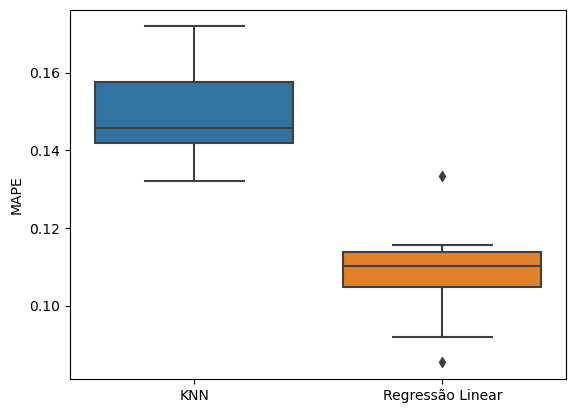

In [28]:
desempenho = pd.DataFrame({"KNN": erro_reg_knn, "Regressão Linear": erro_reg_lin})
sns.boxplot(data = desempenho)
plt.ylabel("MAPE")
plt.show()

## Teste de hipóteses

Às vezes não é tão trivial definir se duas distribuições são diferentes. Por isso utilizamos testes de hipóteses, para descobrir se dois ou mais resultados são estatísticamente diferentes com uma dada significância (geralmente usa-se 95% ou 99% de confiança). Segue uma imagem para ajudar a escolher o teste certo.

<div>
<img src="./data/escolha_teste_hipoteses.png" width="1500"/>
</div>

Como temos 2 algoritmos e um mesmo domínio e supomos que não temos uma distribuição normal devido à pouca quantidade iremos utilizar o Wilcoxon's Signed-Rank Test. Segue sua implementação em Python.

In [29]:
stat, p = wilcoxon(erro_reg_knn, erro_reg_lin)
print('Estatistica =', stat, ', valor p =', p)

alpha = 0.05
if p > alpha:
    print('Mesma distribuição (Não se pode rejeitar a H0)')
else:
    print('Diferentes distribuições (Rejeita a H0)')

Estatistica = 0.0 , valor p = 0.001953125
Diferentes distribuições (Rejeita a H0)


## Alguns links utilizados para este notebook:

https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

http://jse.amstat.org/v19n3/decock.pdf

https://scikit-learn.org/stable/index.html

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

Slide do curso "AutoML", Evaluation Benchmarking and Comparing Learners. Bernd Bischl e Lars Kotthof.
Link para o curso MOOC: https://ki-campus.org/courses/automl-luh2021
